In [1]:
import pandas as pd
from sqlalchemy import create_engine

db_user = "root"
db_password = "12341234"
db_host = "localhost"
db_port = "3306"
db_name = "miniproject"

engine = create_engine(f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

df = pd.read_sql("SELECT * FROM seoul_analysis_view", engine)
df.head()


,district_id,district_name,year,population,population_diff,car_count,car_diff,cctv_count
0,1,종로구,2021,156567,-5417,50049,-11,149
1,1,종로구,2022,153684,-2883,50832,783,149
2,1,종로구,2023,152212,-1472,51000,168,149
3,1,종로구,2024,150550,-1662,50482,-518,149
4,1,종로구,2025,149478,-1072,50083,-399,149


In [2]:
df["car_increase"] = (df["car_diff"] > 0).astype(int)

In [3]:
X = df[["population_diff"]]
y = df["car_increase"]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score

y_pred = log_model.predict(X_test)
accuracy_score(y_test, y_pred)


0.6

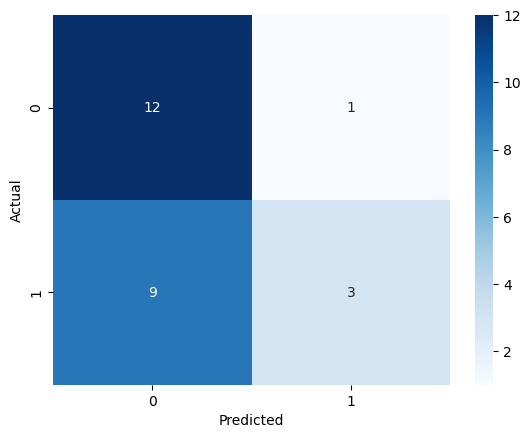

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
coef = log_model.coef_[0][0]
coef


np.float64(9.6968837640434e-05)

생활인구 증감 계수가 양수로 나타나, 인구가 증가할수록 자동차 등록 증가 가능성이 높아지는 경향을 보였다.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


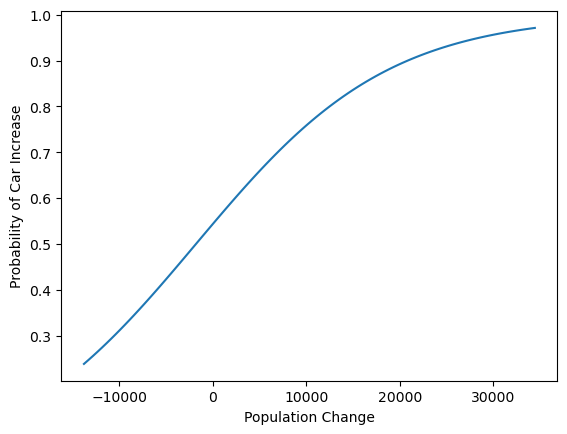

In [10]:
import numpy as np

pop_range = np.linspace(
    df["population_diff"].min(),
    df["population_diff"].max(),
    100
).reshape(-1, 1)

prob = log_model.predict_proba(pop_range)[:, 1]

plt.plot(pop_range, prob)
plt.xlabel("Population Change")
plt.ylabel("Probability of Car Increase")
plt.show()


로지스틱 회귀 분석 결과, 생활인구 변화는 자동차 등록 증가 여부를 예측하는 데 활용 가능한 변수로 나타났다. 특히 인구가 증가할수록 차량 등록 증가 확률이 높아지는 경향을 확인할 수 있었다.